# Moving Average using backtrader

In [1]:
pip install backtrader

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import backtrader as bt
import matplotlib

matplotlib.use('Agg')  # Set a non-interactive backend


# Strategy:

# 1. A buy signal is generated when the 50-day moving average crosses above the 200-day moving average.
# 2. A sell signal is generated when the 50-day moving average crosses below the 200-day moving average.

In [10]:
class MovingAverageCrossover(bt.Strategy):
    params = (("short_period", 50), ("long_period", 200))

    def __init__(self):
        # Define Moving Averages
        self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_period)
        self.sma_long = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_period)

    def next(self):
        if self.sma_short[0] > self.sma_long[0] and self.position.size == 0:
            self.buy()
        elif self.sma_short[0] < self.sma_long[0] and self.position.size > 0:
            self.sell()


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  178.879913   
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.609634   
2022-01-05  179.610001  180.169998  174.639999  174.919998  171.911835   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.042068   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.209137   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


<IPython.core.display.Javascript object>

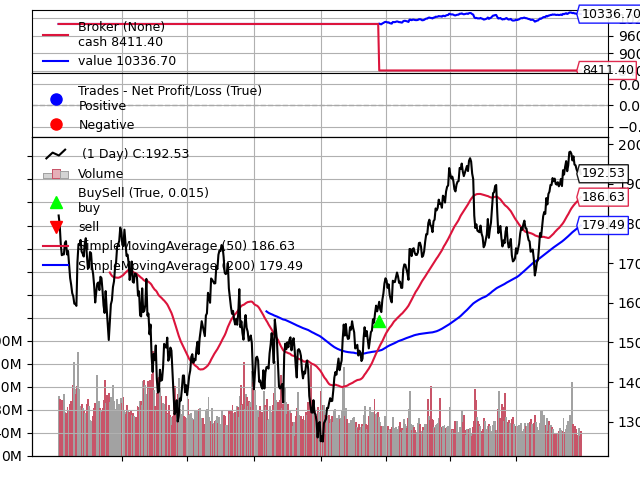

In [11]:
# Download historical data
df = yf.download("AAPL", start="2022-01-01", end="2024-01-01")
print(df.head())  # Check if data is downloaded correctly

# Convert data to Backtrader format
data = bt.feeds.PandasData(dataname=df)


# Initialize Backtrader
cerebro = bt.Cerebro()
cerebro.addstrategy(MovingAverageCrossover)
cerebro.adddata(data)
cerebro.broker.set_cash(10000)  # Starting capital
cerebro.addsizer(bt.sizers.FixedSize, stake=10)  # Shares per trade

# Run Backtest
cerebro.run()

# Save and display plot
fig = cerebro.plot()[0][0]
fig.savefig("backtrader_plot.png")

from IPython.display import display
from PIL import Image
display(Image.open("backtrader_plot.png"))


<IPython.core.display.Javascript object>

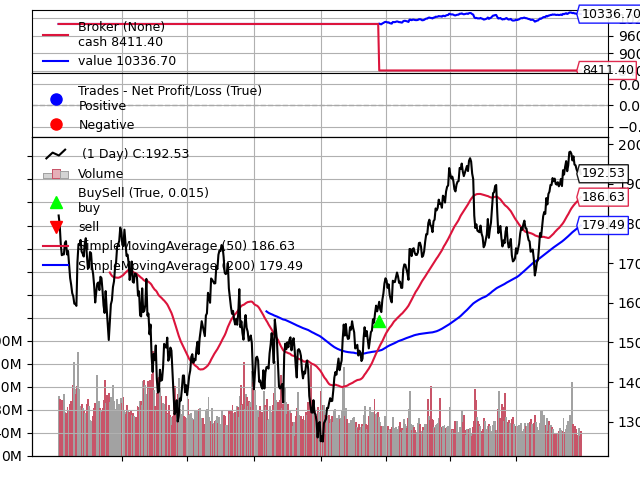

In [7]:
import matplotlib
matplotlib.use('Agg')  # Use a non-interactive backend
import matplotlib.pyplot as plt

# Run Backtrader
cerebro.run()
fig = cerebro.plot()[0][0]  # Extract figure

# Save and display manually
fig.savefig("backtrader_plot.png")

from IPython.display import display
from PIL import Image
display(Image.open("backtrader_plot.png"))
